# Modelo Final
## Random Forest

Modelo final utilizando el set de datos modificado (incluyendo las nuevas columnas, y elimimando otras). El modelo utiliza 20 estimadores.

In [1]:
import pandas as pd
import numpy as np
names = ['hora', 'valor_trx', 'class', 'seg_str', 'ocupacion', 'tipo_vivienda', 'nivel_academico', 'estado_civil', 'genero', 'edad', 'ingreso_rango', 'ultimas_trx', 'ultimo_mes', 'mes', 'dia']
df = pd.read_csv('set5.csv', names=names)

In [2]:
#print(df.head(10))
print('Filas: {}\nColumnas: {}\n'.format(df.shape[0], df.shape[1]))
print(df.isnull().sum())

Filas: 7490652
Columnas: 15

hora                     0
valor_trx                0
class                    0
seg_str                  0
ocupacion           137927
tipo_vivienda      3230964
nivel_academico    1324842
estado_civil       1381618
genero              127532
edad                165074
ingreso_rango        59925
ultimas_trx         362672
ultimo_mes          362672
mes                      0
dia                      0
dtype: int64


In [3]:
df_t10 = df.dropna(thresh=10)
print('>> thresh 10 <<\n   Filas: {}\n   Columnas: {}\n'.format(df_t10.shape[0], df_t10.shape[1]))
df_t11 = df.dropna(thresh=11)
print('>> thresh 11 <<\n   Filas: {}\n   Columnas: {}\n'.format(df_t11.shape[0], df_t11.shape[1]))
df_t12 = df.dropna(thresh=12)
print('>> thresh 12 <<\n   Filas: {}\n   Columnas: {}\n'.format(df_t12.shape[0], df_t12.shape[1]))
df_t13 = df.dropna(thresh=13)
print('>> thresh 13 <<\n   Filas: {}\n   Columnas: {}\n'.format(df_t13.shape[0], df_t13.shape[1]))
df_t14 = df.dropna(thresh=14)
print('>> thresh 14 <<\n   Filas: {}\n   Columnas: {}\n'.format(df_t14.shape[0], df_t14.shape[1]))

>> thresh 10 <<
   Filas: 7361113
   Columnas: 15

>> thresh 11 <<
   Filas: 7340090
   Columnas: 15

>> thresh 12 <<
   Filas: 7241465
   Columnas: 15

>> thresh 13 <<
   Filas: 6897772
   Columnas: 15

>> thresh 14 <<
   Filas: 5677032
   Columnas: 15



In [4]:
del df_t10
del df_t11
del df_t12
del df_t14

In [5]:
df_t13 = df.dropna(thresh=13)
print('>> thresh 13 <<\n   Filas: {}\n   Columnas: {}\n'.format(df_t13.shape[0], df_t13.shape[1]))

>> thresh 13 <<
   Filas: 6897772
   Columnas: 15



In [6]:
df1 = df_t13.fillna(value=df_t13.mode().iloc[0])
print('Filas: {}\nColumnas: {}\n'.format(df1.shape[0], df1.shape[1]))
print(df1.isnull().sum())

Filas: 6897772
Columnas: 15

hora               0
valor_trx          0
class              0
seg_str            0
ocupacion          0
tipo_vivienda      0
nivel_academico    0
estado_civil       0
genero             0
edad               0
ingreso_rango      0
ultimas_trx        0
ultimo_mes         0
mes                0
dia                0
dtype: int64


In [7]:
del df_t13
del df

In [8]:
from sklearn.model_selection import train_test_split

x = df1.drop('class', axis = 1)
y = df1['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=548, stratify=y)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from functools import reduce

clf = RandomForestClassifier(n_jobs=3, n_estimators=25, random_state=895)
clf.fit(x_train, y_train)
print(' '.join(['{0:.2f}'.format(x) for x in clf.feature_importances_]))

predict = clf.predict(x_test)

/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.13 0.20 0.01 0.03 0.02 0.03 0.02 0.02 0.10 0.04 0.12 0.11 0.07 0.10


In [10]:
import scikitplot as skplt
from sklearn import metrics

print("\n#### Accuracy DT ####")
print(metrics.accuracy_score(y_test, predict))
print("\n#### Matriz de Confusion DT ####")
print(metrics.confusion_matrix(y_test, predict))  
print("\n#### Metricas DT ####")
print(metrics.classification_report(y_test, predict)) 

/home/miguel/anaconda3/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 12] Cannot allocate memory.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))



#### Accuracy DT ####
0.566698681821312

#### Matriz de Confusion DT ####
[[ 75634   6743   5970   5963   3643   1746   2473   5948   3960   8924
     701   1219    399   3096]
 [  8665  70972   4582   4833   3525   1107   1188   4139   4142   9836
     521    979    365   1746]
 [  7984   5179  59648   4734   3896   1281   1276   6263   4010   8386
     613   1264    588   1704]
 [ 11485   7307   6109  47875   5924   1802   2425   8677   6095  16889
     600   3373    885   1909]
 [  5792   5495   5100   6647  78168   1391   1079   5473   4791  12564
     562   1255    585   1175]
 [  4258   2645   2791   2898   2082  28871    684   3556   2182   5298
     279    682    352    814]
 [  6301   2747   2456   3737   1809    923  20560   3436   2526   5563
     196    632    245    999]
 [  8115   5247   6007   6858   4652   2353   2115  71689   8511  16419
     612   1373    414   1668]
 [  4527   4237   3012   4145   3308   1468   1450   9309  92061  16392
     247   1103    344    857

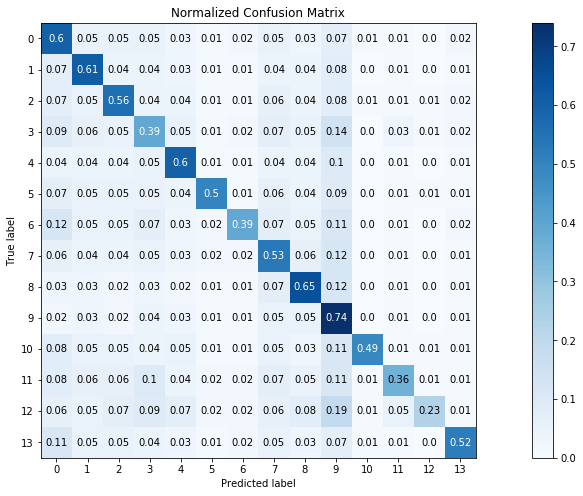

In [11]:
plot = skplt.metrics.plot_confusion_matrix(y_test, predict, normalize=True, title='', figsize=(20,8))